In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.preprocessing import StandardScaler
import mglearn

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']= False

## 군집 알고리즘 비교와 평가 

#### 타겟값으로 군집 평가

ARI / NMI : 군집이 최적일 때 점수 1로 주고, 무작위로 분류되 군집일 경우 점수를 0 으로 줌, 0-1 사이 값으로 줌

** ARI 점수가 음수로 나올수도 있음

In [3]:
from sklearn.metrics.cluster import adjusted_rand_score

In [4]:
x, y = make_moons(n_samples = 200, noise = 0.05, random_state=0)

In [5]:
scaler =StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [6]:
# 군집분석 알고리즘 모델 리스트 만들기
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
             DBSCAN()]

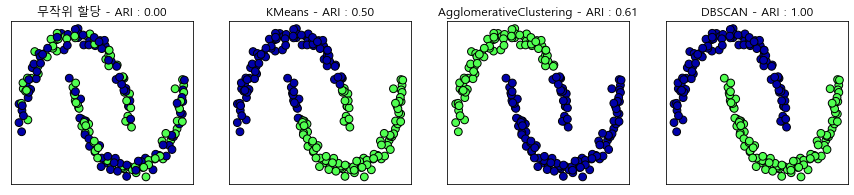

In [7]:
fig, axes = plt.subplots(1, 4, figsize = (15,3),
                         subplot_kw={'xticks':(), 'yticks':()})

# 군집분석 알고리즘들과 비교를 위해서 무작위로 클러스터 할당한 것
random_state = np.random.RandomState(seed = 0)
random_clusters = random_state.randint(low = 0, high = 2, size = (len(x_scaled)))

# 무작위로 할당한 클러스터 그림
axes[0].scatter(x_scaled[:, 0], x_scaled[:,1], c= random_clusters,
               cmap=mglearn.cm3, s=60, edgecolors = 'black')
axes[0].set_title('무작위 할당 - ARI : {:.2f}'.format(
adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms) :
    clusters = algorithm.fit_predict(x_scaled)
    ax.scatter(x_scaled[:,0], x_scaled[:,1], c=clusters,
    cmap=mglearn.cm3, s=60, edgecolors = 'black')
    ax.set_title('{} - ARI : {:.2f}'.format(algorithm.__class__.__name__,
                                            adjusted_rand_score(y, clusters)))

In [8]:
from sklearn.metrics import accuracy_score

# 
cluster1 = [0,0,1,1,0]
cluster2 = [1,1,0,0,1]

In [9]:
print('정확도 : {:.2f}'. format(accuracy_score(cluster1, cluster2)))

정확도 : 0.00


In [11]:
print('ARI : {:.2f}'. format(adjusted_rand_score(cluster1, cluster2)))

ARI : 1.00


- 군집분석에서는 accuracy 사용하면 안됨
- ARI / NMI 를 사용해야함

#### 실루엣 지수 
- 이 지표는 좀 정확하지 않은 점수
- 클러스터의 밀집정도를 계산하는 값
- 점수가 높을수록 좋고 최대점수 1
- 데이터가 복잡할 때는 밀집도를 활횽한 점수가 잘 안맞음
- 1일때 완전 잘못된 군집, 0-중첩된 군집, 1- 잘 구분된 군집

In [12]:
from sklearn.metrics.cluster import  silhouette_score

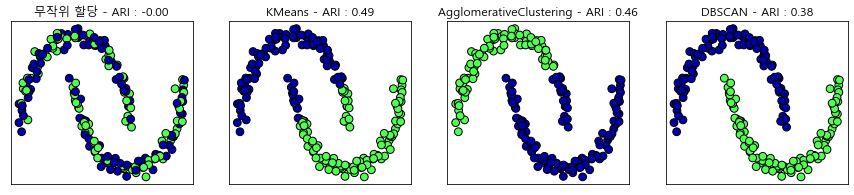

In [14]:
fig, axes = plt.subplots(1, 4, figsize = (15,3),
                         subplot_kw={'xticks':(), 'yticks':()})

# 군집분석 알고리즘들과 비교를 위해서 무작위로 클러스터 할당한 것
random_state = np.random.RandomState(seed = 0)
random_clusters = random_state.randint(low = 0, high = 2, size = (len(x_scaled)))

# 무작위로 할당한 클러스터 그림
axes[0].scatter(x_scaled[:, 0], x_scaled[:,1], c= random_clusters,
               cmap=mglearn.cm3, s=60, edgecolors = 'black')
axes[0].set_title('무작위 할당 - ARI : {:.2f}'.format(
     silhouette_score(x_scaled, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms) :
    clusters = algorithm.fit_predict(x_scaled)
    ax.scatter(x_scaled[:,0], x_scaled[:,1], c=clusters,
                cmap=mglearn.cm3, s=60, edgecolors = 'black')
    ax.set_title('{} - ARI : {:.2f}'.format(algorithm.__class__.__name__,
                                            silhouette_score(x_scaled, clusters)))

군집모델이 안정적이거나 실루엣 점수가 높다고 하더라도, 군집에 어떤 유의미한 것이 있는지나 군집이 데이터의 흥미로운 feature를 반영하고 있는지 알 수 없음

- 실루엣 잘 작동x